## GReaT Example with California Housing Dataset （dealing with VRUOC scenarios)

First of all, let me make the new column of `cluster` with the string values indicating area clusters.

In [1]:
!python area_cluster.py

In [2]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="6" # or other number as you like

import numpy as np
import pandas as pd
from sklearn import datasets
from examples.utils import set_logging_level
from be_great import GReaT
import matplotlib.pyplot as plt
import logging
logger = set_logging_level(logging.INFO)

### Load Data

In [3]:
## The authentic way to import the dataset of california housing csv
# data = datasets.fetch_california_housing(as_frame=True).frame
# data.head()

### An easier alternative to import the same dataset under bad internet gateway situation.
data = pd.read_csv('examples/cal_dataframe_area_clusters_in_letters.csv')

### Create GReaT Model

Only one epoch here for demonstration

In [4]:
great = GReaT("../pretrainedModels_and_archivedFiles_and_stuffs/distilgpt2", # Name of the large language model used (see HuggingFace for more options)
              epochs=1,                             # Number of epochs to train (only one epoch for demonstration)
              save_steps=2000,                      # Save model weights every x steps
              logging_steps=50,                     # Log the loss and learning rate every x steps
              experiment_dir="trainer_california",  # Name of the directory where all intermediate steps are saved
              #lr_scheduler_type="constant",        # Specify the learning rate scheduler 
              #learning_rate=5e-5                   # Set the inital learning rate
             )

### Start Training

The fit function should be rewritten because here the textual encoding should be adapted to VRUOC.
The format is like:

Cluster Has xxx lines of items: (the rest is the same in original GReaT subject+predicate structure). 


In [5]:
# trainer = great.fit(data) # of course you can alos apply the clustered data in the original GReaT way.
trainer = great.fit_VRUOC(data, cluster='cluster_string')

2024-08-01 15:40:33,047 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2024-08-01 15:40:33,110 - INFO - Create GReaT Trainer... (great.py:158)
2024-08-01 15:40:34,400 - WARNING - Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher. (other.py:349)
2024-08-01 15:40:36,190 - INFO - Start training... (great.py:174)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
50,2.934800
100,2.194700
150,2.090300
200,2.015000
250,2.001400
300,1.983400
350,1.934500
400,1.916300
450,1.907200
500,1.878300


In [15]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 112.2504,
 'train_samples_per_second': 183.875,
 'train_steps_per_second': 22.984,
 'total_flos': 460617178152960.0,
 'train_loss': 1.8180961254031158,
 'epoch': 1.0,
 'step': 2580}

In [16]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

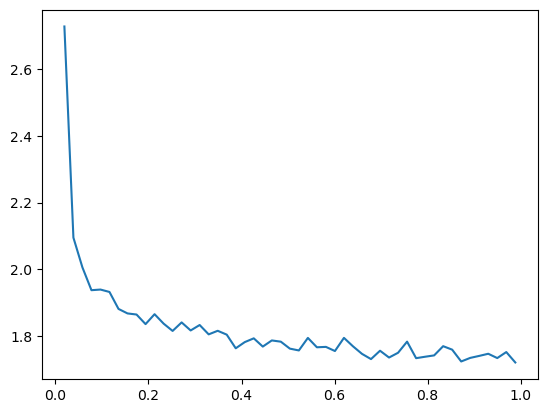

In [17]:
plt.plot(epochs, loss)

### Save Model

In [18]:
great.save("california")

### Load Model

In [ ]:
# great = GReaT.load_from_dir("california")

In [ ]:
great.load_finetuned_model("../great_private/models/california/california_distilgpt2_100.pt")

### Generate Samples

In [19]:
n_samples = 1000

In [21]:
samples = great.sample(n_samples, k=50, device="cuda:0")

1030it [00:13, 78.61it/s]                         


In [22]:
samples.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.5929,22.0,7.092957,1.040909,935.0,2.087692,33.80,-118.22,3.944
1,3.5705,19.0,5.527665,1.000000,2874.0,4.944295,37.83,-122.16,1.060
2,3.5221,33.0,5.800000,0.950000,638.0,3.700000,34.18,-118.36,1.997
3,3.5453,17.0,4.500000,1.010000,1484.0,2.847000,37.79,-122.34,1.352
4,2.5000,12.0,5.395540,1.000000,1742.0,2.500000,38.33,-121.84,1.875


In [23]:
samples.shape

(1000, 9)

In [24]:
samples.to_csv("california_samples.csv")

## Plot Data

Original Data

In [25]:
true_samples = data.sample(n = 1000)

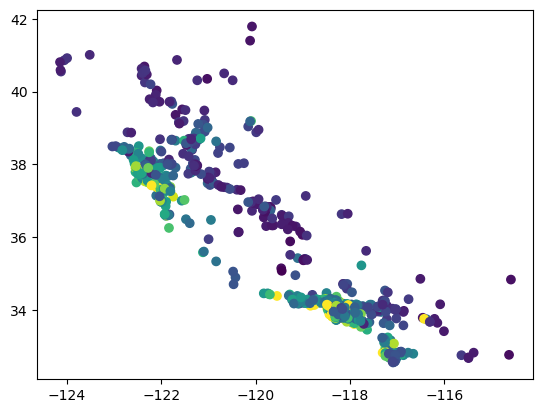

In [26]:
plt.scatter(true_samples["Longitude"], true_samples["Latitude"], c=true_samples["MedHouseVal"])

Generated samples

In [27]:
#samples = pd.read_csv("california_samples.csv")

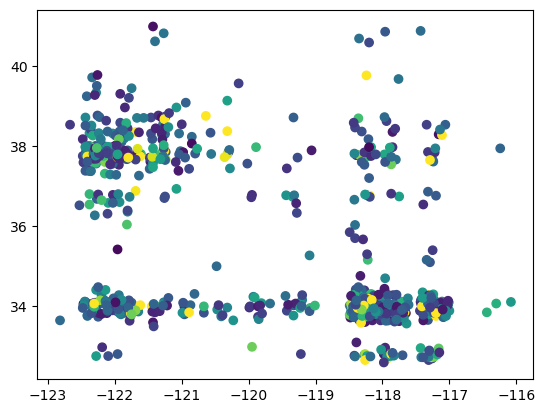

In [28]:
plt.scatter(samples["Longitude"], samples["Latitude"], c=samples["MedHouseVal"])